In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [2]:
sns.set(style="white", palette="muted", color_codes=True)

In [3]:
lidar_static = np.load("other/lidar_array_static.npy")
lidar_agent_static = np.load("other/lidar_array_agent_static.npy")
lidar_dynamic = np.load("other/lidar_array_agent_dynamic.npy")

In [4]:
def preprocess_data(X, num_measurements=10, num_samples=100, max_value=1900):
    X = X.astype(np.float32)
    X[X > max_value] = 2000.
    X = np.reshape(X, (num_measurements, num_samples))
    return X

In [5]:
def plot_lidar(X, title="", step=1):
    N, M = X.shape
    sub_idxs = np.arange(start=0., stop=M, step=1)
    sub_idxs = sub_idxs.astype(np.int32)
    plt.figure(figsize=(25, 10))
    for i in range(0, X.shape[0]):
        plt.plot(X[i, sub_idxs], label='measurement {}'.format(i))
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

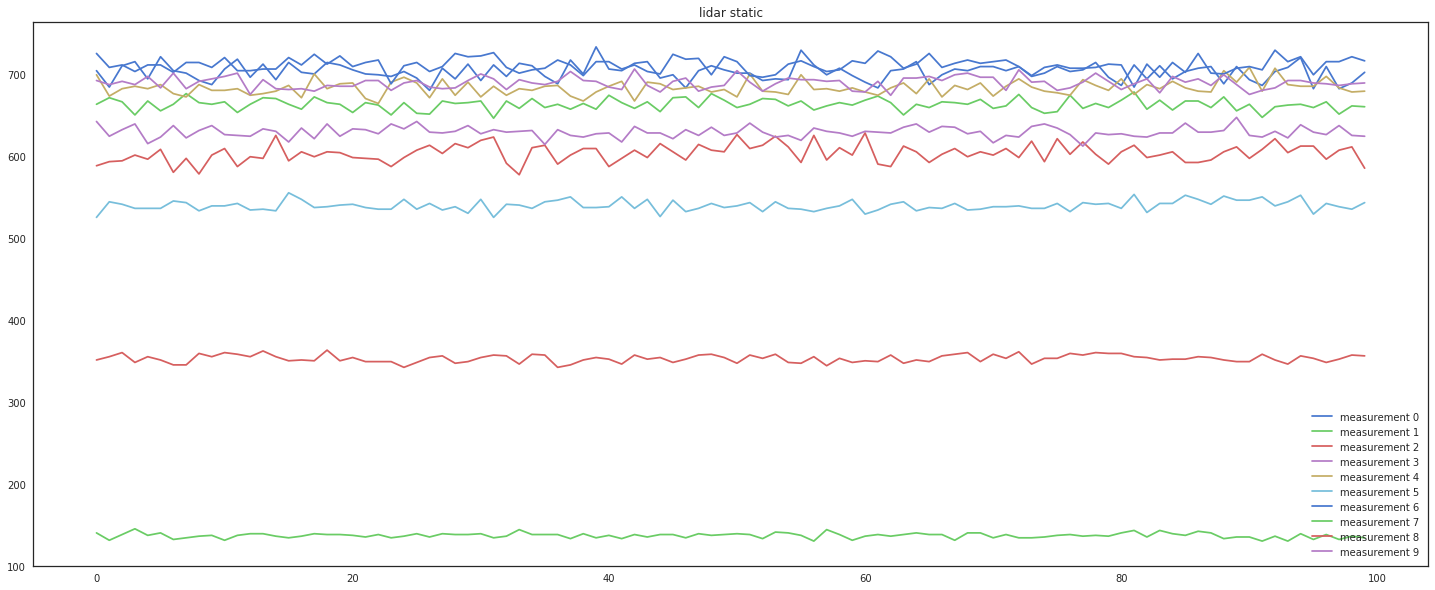

In [6]:
X_static = preprocess_data(lidar_static)
plot_lidar(X_static, title='lidar static')

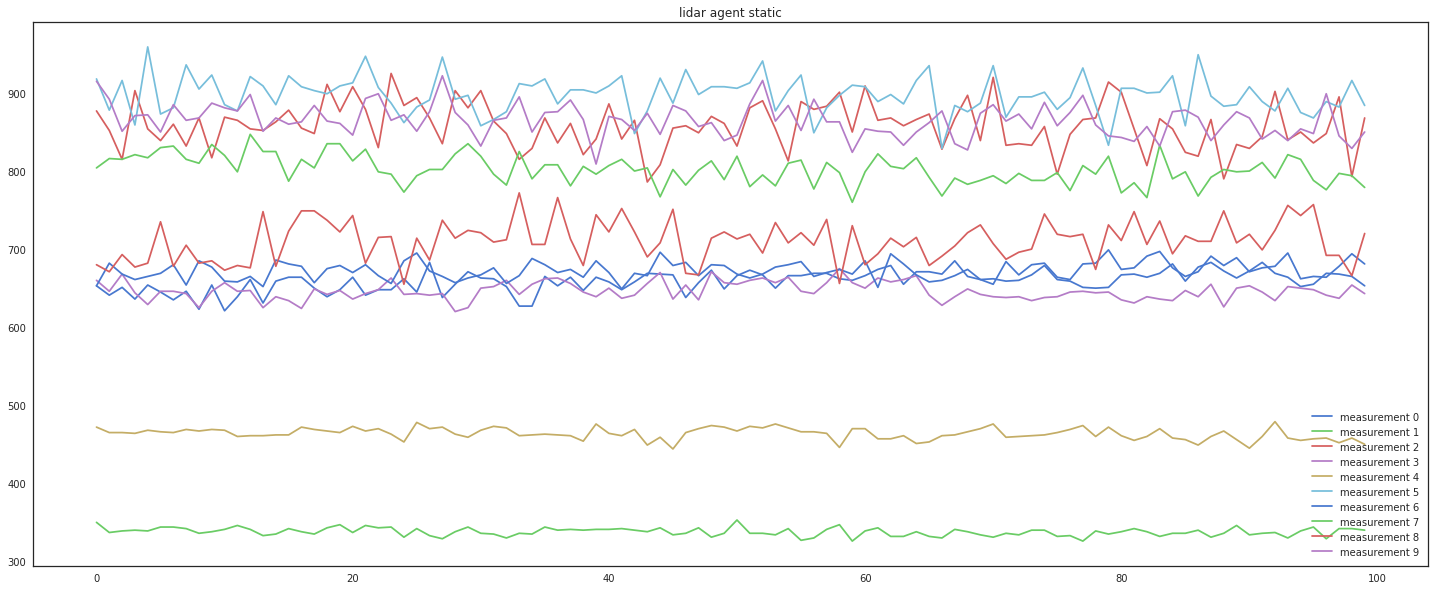

In [7]:
X_agent_static = preprocess_data(lidar_agent_static)
plot_lidar(X_agent_static, title='lidar agent static')

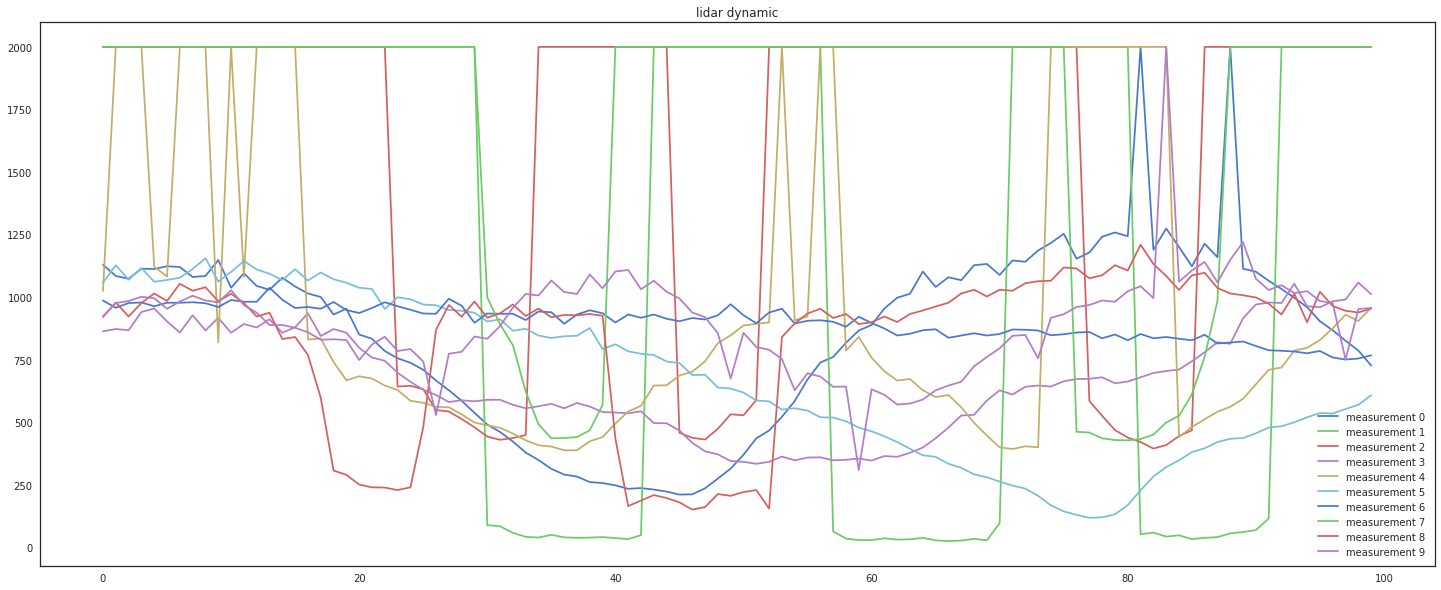

In [8]:
X_agent_dynamic = preprocess_data(lidar_dynamic)
plot_lidar(X_agent_dynamic, title='lidar dynamic')

## visualize

In [9]:
lidar_data = np.vstack((X_static, X_agent_dynamic))
n_comp = 2

In [10]:
lidar_data.shape

(20, 100)

In [11]:
km = KMeans(n_clusters=n_comp, max_iter=10000)
km.fit(lidar_data)
km.predict(lidar_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
      dtype=int32)

In [12]:
gm = GaussianMixture(n_components=n_comp, max_iter=10000)
gm.fit(lidar_data)
print(gm.score(lidar_data))
print(gm.bic(lidar_data))
print(gm.predict(lidar_data))
print(gm.converged_)

412.2720674451101
14368.155452075254
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
True


In [13]:
bgm = BayesianGaussianMixture(n_components=n_comp, max_iter=10000)
bgm.fit(lidar_data)
print(bgm.predict(lidar_data))

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0]


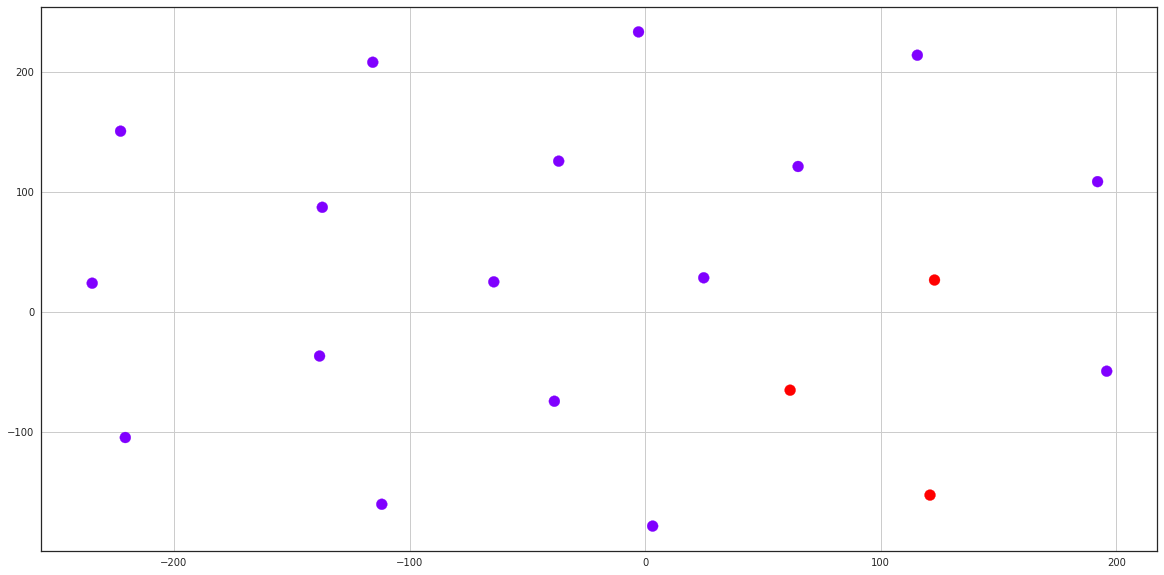

In [20]:
tsne = TSNE()
lidar_2dim = tsne.fit_transform(lidar_data)
plt.figure(figsize=(20, 10))
plt.scatter(lidar_2dim[:, 0], lidar_2dim[:, 1], c=bgm.predict(lidar_data), s=120, cmap=cm.rainbow)
plt.grid()